<a href="https://colab.research.google.com/github/Saifullah785/deep-learning-projects/blob/main/Project_03_forecasting_financial_market/Project_03_forecasting_Stock_Market.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Stock Market Forecasting with ARIMA, SARIMA , SARIMAX | A complete Project A-Z**

#**Stock Market Data scraping in Python**


In [ ]:
# Import necessary libraries for data manipulation, visualization, and time series analysis
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
import yfinance as yf
import datetime as dt
from datetime import datetime, timedelta
import plotly.graph_objects as go
import plotly.express as px
#
# Import time series analysis tools from statsmodels
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
# Get today's date
dt.date.today()

datetime.date(2025, 7, 11)

In [ ]:
# Define the start and end dates for data retrieval
today = dt.date.today()
d1 = today.strftime("%Y-%m-%d")
end_date = d1
d2 = dt.date.today() - timedelta(days=365)
d2 = d2.strftime("%Y-%m-%d")
start_date = d2
# Print the date range for the data
print("Your data will be between these dates:",start_date, end_date)

Your data will be between these dates: 2024-07-11 2025-07-11


In [ ]:
# Download historical stock data for a specified ticker
ticker = 'GOOGL' #DX-Y.NYB

# Download historical stock data using yfinance
df = yf.download(ticker, start=start_date, end=end_date, progress=False)
# Display the first few rows of the DataFrame
display(df.head())

/tmp/ipython-input-4-6920426.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(ticker, start=start_date, end=end_date, progress=False)


Price,Close,High,Low,Open,Volume
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL
Date,,,,,
2024-07-11,184.675415,189.939906,184.187772,188.934781,25625800
2024-07-12,184.177841,186.208000,183.600635,184.187788,22898400
2024-07-15,185.630783,187.332546,184.028544,184.028544,16474000
2024-07-16,183.033356,187.770403,182.486004,186.456775,18290700
2024-07-17,180.147354,182.665156,179.032743,182.087951,20734100


In [ ]:
# Display information about the DataFrame, including data types and non-null values
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2024-07-11 to 2025-07-10
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   (Close, GOOGL)   250 non-null    float64
 1   (High, GOOGL)    250 non-null    float64
 2   (Low, GOOGL)     250 non-null    float64
 3   (Open, GOOGL)    250 non-null    float64
 4   (Volume, GOOGL)  250 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.7 KB


In [ ]:
# Insert the Date index as a new column (commented out)
# df.insert(0, 'Date', df.index, True)

In [ ]:
# Add the index as a 'Date' column and reset the index
df['Date'] = df.index
# Reset the index to a default integer index and drop the old index
df.reset_index(drop=True, inplace=True)

In [ ]:
# Display information about the DataFrame after adding and resetting the index
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   (Close, GOOGL)   250 non-null    float64       
 1   (High, GOOGL)    250 non-null    float64       
 2   (Low, GOOGL)     250 non-null    float64       
 3   (Open, GOOGL)    250 non-null    float64       
 4   (Volume, GOOGL)  250 non-null    int64         
 5   (Date, )         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
# Display the first few rows of the DataFrame after adding and resetting the index
display(df.head())

Price,Close,High,Low,Open,Volume,Date
Ticker,GOOGL,GOOGL,GOOGL,GOOGL,GOOGL,
0,184.675415,189.939906,184.187772,188.934781,25625800,2024-07-11
1,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
2,185.630783,187.332546,184.028544,184.028544,16474000,2024-07-15
3,183.033356,187.770403,182.486004,186.456775,18290700,2024-07-16
4,180.147354,182.665156,179.032743,182.087951,20734100,2024-07-17


In [ ]:
# Display the column names of the DataFrame
display(df.columns)

MultiIndex([( 'Close', 'GOOGL'),
            (  'High', 'GOOGL'),
            (   'Low', 'GOOGL'),
            (  'Open', 'GOOGL'),
            ('Volume', 'GOOGL'),
            (  'Date',      '')],
           names=['Price', 'Ticker'])

In [ ]:
# Flatten the MultiIndex columns into single string column names
df.columns = [''.join(col).strip() for col in df.columns.values]

In [ ]:
# Display information about the DataFrame after renaming columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CloseGOOGL   250 non-null    float64       
 1   HighGOOGL    250 non-null    float64       
 2   LowGOOGL     250 non-null    float64       
 3   OpenGOOGL    250 non-null    float64       
 4   VolumeGOOGL  250 non-null    int64         
 5   Date         250 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.8 KB


In [ ]:
# Display the first few rows of the DataFrame after renaming columns
display(df.head())

,CloseGOOGL,HighGOOGL,LowGOOGL,OpenGOOGL,VolumeGOOGL,Date
0,184.675415,189.939906,184.187772,188.934781,25625800,2024-07-11
1,184.177841,186.208000,183.600635,184.187788,22898400,2024-07-12
2,185.630783,187.332546,184.028544,184.028544,16474000,2024-07-15
3,183.033356,187.770403,182.486004,186.456775,18290700,2024-07-16
4,180.147354,182.665156,179.032743,182.087951,20734100,2024-07-17


In [ ]:
# Select only the 'Date' and 'CloseGOOGL' columns
df = df[['Date','CloseGOOGL']]
# Display the first few rows of the filtered DataFrame
display(df.head())

,Date,CloseGOOGL
0,2024-07-11,184.675415
1,2024-07-12,184.177841
2,2024-07-15,185.630783
3,2024-07-16,183.033356
4,2024-07-17,180.147354


In [ ]:
# Display the shape of the filtered DataFrame (number of rows and columns)
display(df.shape)

(250, 2)

In [ ]:
# Create a line plot of the 'CloseGOOGL' price over time
fig = px.line(df, x='Date', y='CloseGOOGL', title='Time Series Data')
# Display the plot
fig.show()

In [ ]:
# Define a function to check for stationarity using the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

def check_stationarity(df):
    # Perform the ADF test
    result = adfuller(df)
    # Print the ADF statistic and p-value
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    # Check the p-value to determine stationarity
    if result[1] <= 0.05:
        print('Reject the null hypothesis. data is stationary')
    else:
        print('Fail to reject the null hypothesis.Data is not stationary')

In [ ]:
# Check the stationarity of the 'CloseGOOGL' column
check_stationarity(df['CloseGOOGL'])

ADF Statistic: -1.741623
p-value: 0.409805
Fail to reject the null hypothesis.Data is not stationary


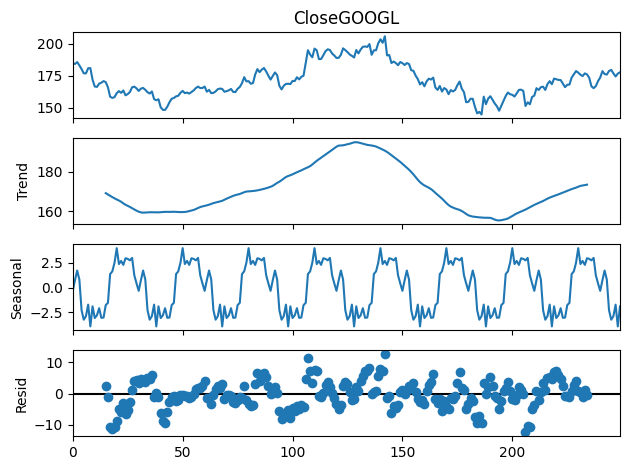

In [ ]:
# Decompose the time series data into trend, seasonal, and residual components
from statsmodels.tsa.seasonal import seasonal_decompose
# Model='additive' assumes the components add up to the observed series.
# Period=30 assumes a seasonality of 30 days (e.g., monthly).
decompose = seasonal_decompose(df['CloseGOOGL'], model='additive', period=30)
# Plot the decomposed components (trend, seasonal, residual)
decompose.plot()
# Display the plot
plt.show()

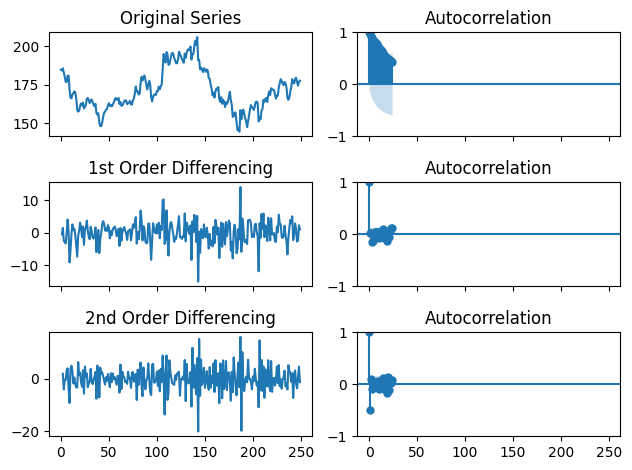

In [ ]:
# Plot the Auto-Correlation Function (ACF) and Partial Auto-Correlation Function (PACF)
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Create subplots for displaying original series and differenced series with their ACF plots
fig, axes = plt.subplots(3, 2, sharex=True)

# Plot the original series and its ACF
axes[0, 0].plot(df['CloseGOOGL'])
axes[0, 0].set_title('Original Series')
plot_acf(df['CloseGOOGL'], ax=axes[0, 1])

# Plot the 1st order differenced series and its ACF
axes[1, 0].plot(df['CloseGOOGL'].diff())
axes[1, 0].set_title('1st Order Differencing')
plot_acf(df['CloseGOOGL'].diff().dropna(), ax=axes[1, 1])

# Plot the 2nd order differenced series and its ACF
axes[2, 0].plot(df['CloseGOOGL'].diff().diff())
axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df['CloseGOOGL'].diff().diff().dropna(), ax=axes[2, 1])

# Adjust layout to prevent overlapping titles and labels
plt.tight_layout()
# Display the plots
plt.show()

In [ ]:
# Calculate the first order difference of the 'CloseGOOGL' column
df['CloseGOOGL_diff'] = df['CloseGOOGL'].diff()
# Display the first few rows of the DataFrame with the new differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff
0,2024-07-11,184.675415,NaN
1,2024-07-12,184.177841,-0.497574
2,2024-07-15,185.630783,1.452942
3,2024-07-16,183.033356,-2.597427
4,2024-07-17,180.147354,-2.886002


In [ ]:
# Check the stationarity of the first order differenced 'CloseGOOGL' column
check_stationarity(df['CloseGOOGL_diff'].dropna())

ADF Statistic: -9.719106
p-value: 0.000000
Reject the null hypothesis. data is stationary


In [ ]:
# Calculate the second order difference of the 'CloseGOOGL' column
df['CloseGOOGL_diff2'] = df['CloseGOOGL'].diff().diff()
# Display the first few rows of the DataFrame with the new 2nd order differenced column
display(df.head())

,Date,CloseGOOGL,CloseGOOGL_diff,CloseGOOGL_diff2
0,2024-07-11,184.675415,NaN,NaN
1,2024-07-12,184.177841,-0.497574,NaN
2,2024-07-15,185.630783,1.452942,1.950516
3,2024-07-16,183.033356,-2.597427,-4.050369
4,2024-07-17,180.147354,-2.886002,-0.288574


d=1

#**Lets find p value**

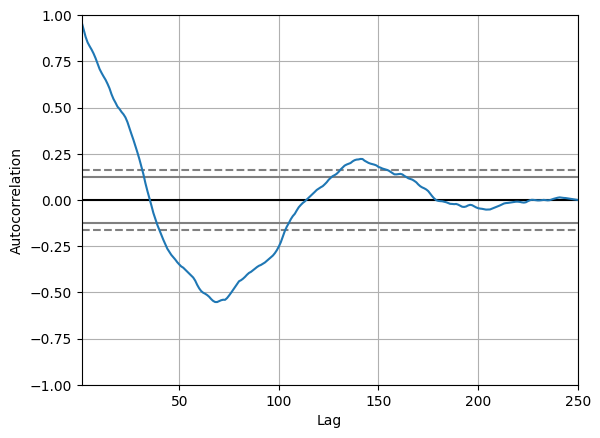

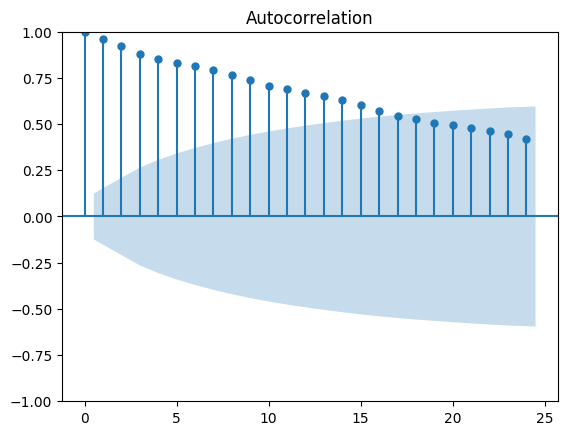

           0
0   1.000000
1   0.962109
2   0.922939
3   0.881895
4   0.851944
5   0.831802
6   0.813218
7   0.791848
8   0.766526
9   0.737210
10  0.708397
11  0.687403
12  0.668092
13  0.650233
14  0.628106
15  0.603278
16  0.571544
17  0.545755
18  0.526086
19  0.504600
20  0.492311
21  0.476289
22  0.463389
23  0.446222


In [ ]:
# Plot the autocorrelation of the 'CloseGOOGL' column
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
pd.plotting.autocorrelation_plot(df['CloseGOOGL'])

plot_acf(df['CloseGOOGL'], alpha=0.05)

# plot_pacf(df['CloseGOOGL'])
plt.show()

from statsmodels.tsa.stattools import acf, pacf
x_acf = pd.DataFrame(acf(df['CloseGOOGL']))
print(x_acf)

**P=2**

# **Lets find q value**

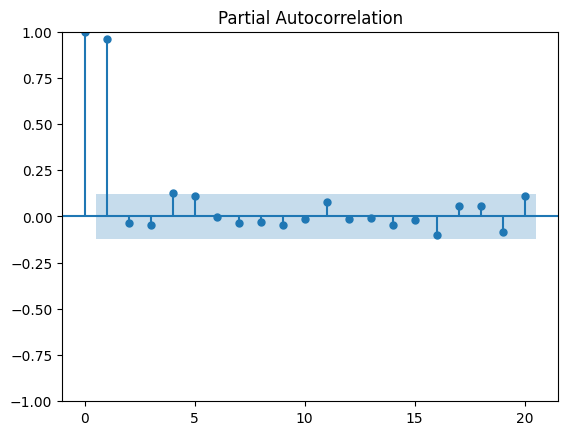

In [ ]:
# Plot the partial autocorrelation of the 'CloseGOOGL' column
from statsmodels.tsa.stattools import acf, pacf
plot_pacf(df['CloseGOOGL'],lags=20, alpha=0.05)
plt.show()

In [ ]:
# Define the ARIMA model parameters (p, d, q)
p = 2
d = 1
q = 2

In [ ]:
# Install the pmdarima library for auto ARIMA
!pip install pmdarima

In [ ]:
# Install the pmdarima library for auto ARIMA (duplicate)
!pip install pmdarima

In [ ]:
# Fit an auto ARIMA model to the 'CloseGOOGL' data
from pmdarima.arima import auto_arima

model = auto_arima(df['CloseGOOGL'], start_p=1, start_q=1, max_p=2,max_q=2, m = 12, start_p=0, seasonal=True, d=1, D=1, trace= True, error_action='ignore',suppress_warnings=True )
model.summary()

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
# Fit an auto ARIMA model with default parameters (seasonal=True)
model = auto_arima(df['CloseGOOGL'], seasonal=True, suppress_warnings=True)
print(model.summary())

NameError: name 'auto_arima' is not defined